## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.data.shape)

x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
logreg = linear_model.LogisticRegression()

# 訓練模型
clf.fit(x_train, y_train)
logreg.fit(x_train, y_train)

# 預測測試集
y_pred_clf = clf.predict(x_test)
y_pred_log = logreg.predict(x_test)

acc_clf = accuracy_score(y_test, y_pred_clf)
print("clf_Accuracy: ", acc_clf)
acc_log = accuracy_score(y_test, y_pred_log)
print("logreg_Accuracy: ", acc_log)

(569, 30)
clf_Accuracy:  0.8947368421052632
logreg_Accuracy:  0.8245614035087719


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [2]:
print(breast_cancer.feature_names)
print("Feature importance: \n", clf.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Feature importance: 
 [0.         0.         0.         0.04644139 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.75207892 0.
 0.         0.         0.         0.20147969 0.         0.        ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


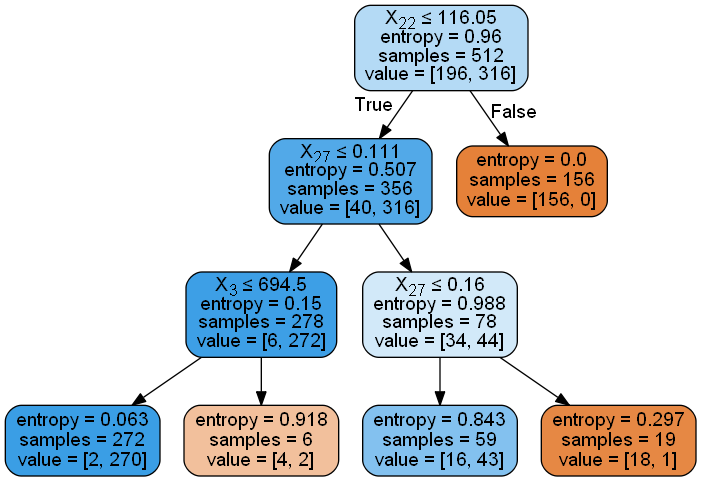

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())